# BTC/USD Minute Data - Exploratory Data Analysis (EDA)

This notebook performs comprehensive exploratory data analysis on BTC/USD minute-level price data to understand patterns, trends, and data quality characteristics.

## 1. Import Required Libraries

Import the necessary libraries for data analysis and visualization.

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from pathlib import Path
from datetime import datetime

# Set visualization style
plt.style.use('default')
sns.set_palette("husl")
warnings.filterwarnings('ignore')

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

print("✅ Libraries imported successfully!")

Matplotlib is building the font cache; this may take a moment.


✅ Libraries imported successfully!


## 2. Load BTC/USD Minute Data

Load the CSV file containing BTC/USD minute-level price data, handling different possible file paths.

In [2]:
# Load BTC/USD minute data
# Try different possible file paths
file_paths = [
    '../data/BTCUSD_minute.csv',      # From notebooks directory
    'data/BTCUSD_minute.csv',         # From root directory
    './data/BTCUSD_minute.csv'        # Alternative path
]

df = None
for file_path in file_paths:
    try:
        if Path(file_path).exists():
            df = pd.read_csv(file_path)
            print(f"✅ Successfully loaded data from: {file_path}")
            break
    except Exception as e:
        print(f"❌ Failed to load from {file_path}: {e}")
        continue

if df is None:
    print("❌ Could not find the data file. Please check that BTCUSD_minute.csv exists in the data directory.")
else:
    print(f"📊 Dataset shape: {df.shape}")
    print(f"💾 Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

✅ Successfully loaded data from: ../data/BTCUSD_minute.csv
📊 Dataset shape: (28100, 12)
💾 Memory usage: 6.03 MB


## 3. Display First 10 Rows

Let's examine the structure and first few rows of our dataset.

In [3]:
# Display first 10 rows
print("📋 First 10 rows of the dataset:")
print("=" * 50)
display(df.head(10))

📋 First 10 rows of the dataset:


,timestamp,Open,High,Low,Close,Volume,Dividends,Stock Splits,Returns,Price_Range,VWAP,data_type
0,2025-06-30 15:44:00+00:00,107353.968750,107353.968750,107353.968750,107353.968750,0,0.0,0.0,NaN,0.0,NaN,minute
1,2025-06-30 15:46:00+00:00,107440.289062,107440.289062,107440.289062,107440.289062,98848768,0.0,0.0,0.000804,0.0,107440.289062,minute
2,2025-06-30 15:47:00+00:00,107608.929688,107608.929688,107608.929688,107608.929688,0,0.0,0.0,0.001570,0.0,107440.289062,minute
3,2025-06-30 15:49:00+00:00,107737.421875,107737.421875,107737.421875,107737.421875,363397120,0.0,0.0,0.001194,0.0,107673.881640,minute
4,2025-06-30 15:51:00+00:00,107731.078125,107731.078125,107731.078125,107731.078125,57704448,0.0,0.0,-0.000059,0.0,107680.229345,minute
5,2025-06-30 15:52:00+00:00,107701.250000,107701.250000,107701.250000,107701.250000,211726336,0.0,0.0,-0.000277,0.0,107686.312123,minute
6,2025-06-30 15:53:00+00:00,107492.804688,107492.804688,107492.804688,107492.804688,0,0.0,0.0,-0.001935,0.0,107686.312123,minute
7,2025-06-30 15:54:00+00:00,107490.515625,107490.515625,107490.515625,107490.515625,222408704,0.0,0.0,-0.000021,0.0,107640.669619,minute
8,2025-06-30 15:55:00+00:00,107514.453125,107514.453125,107514.453125,107514.453125,31264768,0.0,0.0,0.000223,0.0,107636.664820,minute
9,2025-06-30 15:56:00+00:00,107545.257812,107545.257812,107545.257812,107545.257812,24412160,0.0,0.0,0.000287,0.0,107634.454951,minute


## 4. Columns, Data Types, and Missing Values

Examine the dataset structure, data types, and check for any missing values.

In [4]:
# Display columns and data types
print("📊 Dataset Information:")
print("=" * 50)
print(f"Shape: {df.shape}")
print(f"Columns: {list(df.columns)}")
print("\n🔍 Data Types:")
print(df.dtypes)

print("\n❓ Missing Values:")
missing_values = df.isnull().sum()
print(missing_values)

if missing_values.sum() == 0:
    print("✅ No missing values found!")
else:
    print(f"⚠️  Total missing values: {missing_values.sum()}")
    
# Convert timestamp to datetime if it's not already
if 'timestamp' in df.columns:
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    print(f"\n📅 Date range: {df['timestamp'].min()} to {df['timestamp'].max()}")
    print(f"⏱️  Time span: {df['timestamp'].max() - df['timestamp'].min()}")

📊 Dataset Information:
Shape: (28100, 12)
Columns: ['timestamp', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits', 'Returns', 'Price_Range', 'VWAP', 'data_type']

🔍 Data Types:
timestamp        object
Open            float64
High            float64
Low             float64
Close           float64
Volume            int64
Dividends       float64
Stock Splits    float64
Returns         float64
Price_Range     float64
VWAP            float64
data_type        object
dtype: object

❓ Missing Values:
timestamp        0
Open             0
High             0
Low              0
Close            0
Volume           0
Dividends        0
Stock Splits     0
Returns          1
Price_Range      0
VWAP             1
data_type       99
dtype: int64
⚠️  Total missing values: 101

📅 Date range: 2025-06-30 15:44:00+00:00 to 2025-07-23 17:35:00+00:00
⏱️  Time span: 23 days 01:51:00


## 5. Summary Statistics

Display comprehensive summary statistics for all numerical columns.

In [5]:
# Display summary statistics
print("📈 Summary Statistics:")
print("=" * 50)
display(df.describe())

# Additional price statistics
if 'Close' in df.columns:
    price_col = 'Close'
elif 'close' in df.columns:
    price_col = 'close'
else:
    price_col = None

if price_col:
    print(f"\n💰 BTC Price Analysis:")
    print(f"Current Price: ${df[price_col].iloc[-1]:,.2f}")
    print(f"Min Price: ${df[price_col].min():,.2f}")
    print(f"Max Price: ${df[price_col].max():,.2f}")
    print(f"Average Price: ${df[price_col].mean():,.2f}")
    print(f"Price Volatility (std): ${df[price_col].std():,.2f}")
    
# Volume statistics if available
volume_cols = [col for col in df.columns if 'volume' in col.lower()]
if volume_cols:
    vol_col = volume_cols[0]
    print(f"\n📊 Volume Analysis ({vol_col}):")
    print(f"Average Volume: {df[vol_col].mean():,.0f}")
    print(f"Max Volume: {df[vol_col].max():,.0f}")
    print(f"Min Volume: {df[vol_col].min():,.0f}")

📈 Summary Statistics:


,Open,High,Low,Close,Volume,Dividends,Stock Splits,Returns,Price_Range,VWAP
count,28100.000000,28100.000000,28100.000000,28100.000000,2.810000e+04,28100.0,28100.0,28099.000000,28100.0,28099.000000
mean,114225.332711,114225.332711,114225.332711,114225.332711,3.275795e+08,0.0,0.0,0.000003,0.0,111179.493203
std,4956.360005,4956.360005,4956.360005,4956.360005,1.942337e+09,0.0,0.0,0.000418,0.0,3559.781211
min,105159.734375,105159.734375,105159.734375,105159.734375,0.000000e+00,0.0,0.0,-0.004177,0.0,106588.779488
25%,108843.675781,108843.675781,108843.675781,108843.675781,0.000000e+00,0.0,0.0,-0.000146,0.0,108039.347204
50%,117331.867188,117331.867188,117331.867188,117331.867188,0.000000e+00,0.0,0.0,0.000000,0.0,110151.459109
75%,118284.656250,118284.656250,118284.656250,118284.656250,6.122086e+07,0.0,0.0,0.000152,0.0,114332.811369
max,123077.632812,123077.632812,123077.632812,123077.632812,3.166156e+10,0.0,0.0,0.011663,0.0,118203.917381



💰 BTC Price Analysis:
Current Price: $117,907.09
Min Price: $105,159.73
Max Price: $123,077.63
Average Price: $114,225.33
Price Volatility (std): $4,956.36

📊 Volume Analysis (Volume):
Average Volume: 327,579,484
Max Volume: 31,661,563,904
Min Volume: 0


## 6. Plot Closing Price Over Time

Visualize BTC price trends over the time period covered in the dataset.

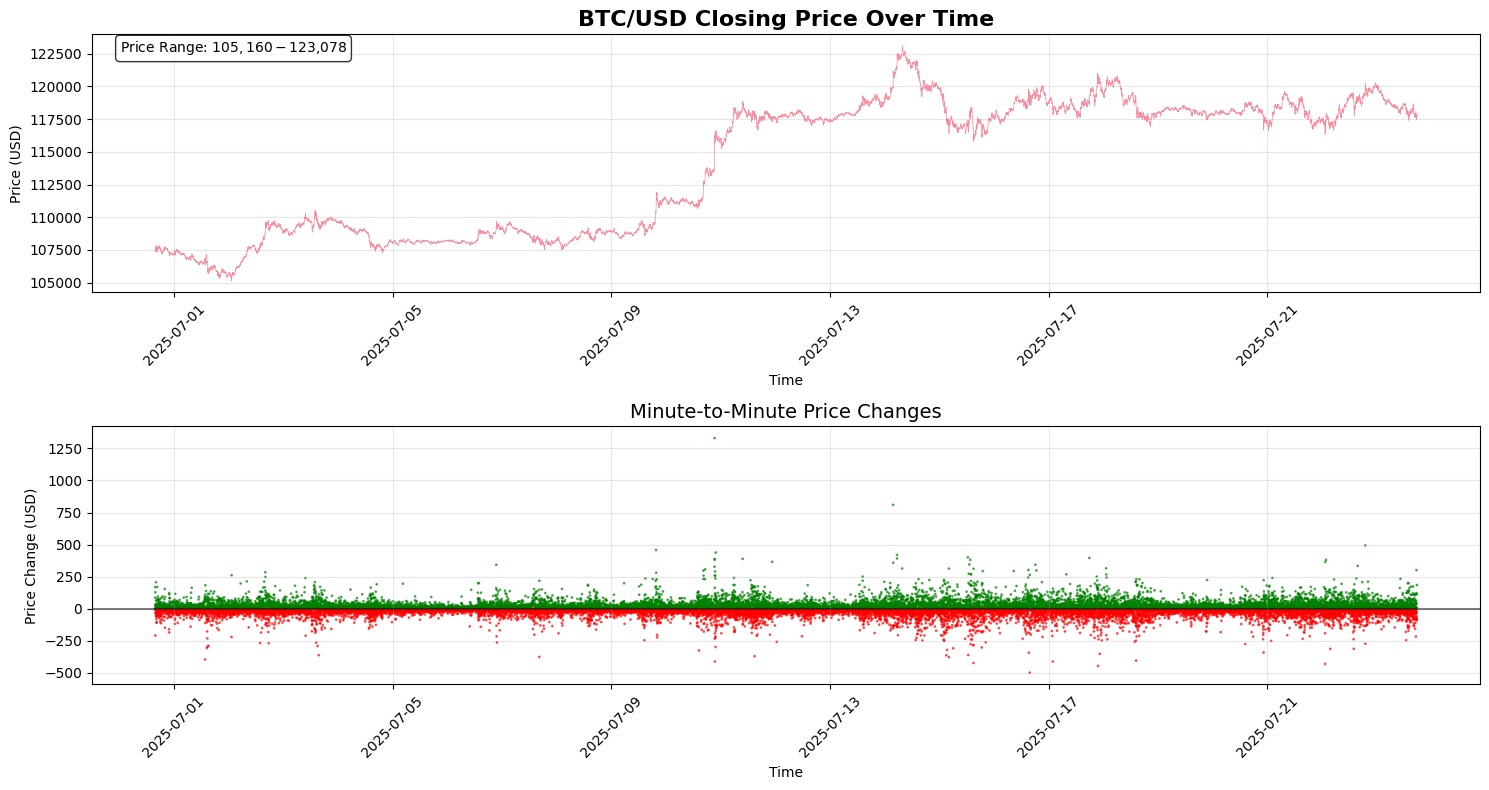

📊 Price Statistics:
   Current Price: $117,907.09
   Period Return: 9.83%
   Max Gain (single minute): $1,330.70
   Max Loss (single minute): $-497.73


In [6]:
# Plot closing price over time
plt.figure(figsize=(15, 8))

# Find the closing price column
if 'Close' in df.columns:
    price_col = 'Close'
elif 'close' in df.columns:
    price_col = 'close'
else:
    price_col = None

if price_col and 'timestamp' in df.columns:
    plt.subplot(2, 1, 1)
    plt.plot(df['timestamp'], df[price_col], linewidth=0.5, alpha=0.8)
    plt.title('BTC/USD Closing Price Over Time', fontsize=16, fontweight='bold')
    plt.xlabel('Time')
    plt.ylabel('Price (USD)')
    plt.grid(True, alpha=0.3)
    plt.xticks(rotation=45)
    
    # Add price range annotation
    plt.text(0.02, 0.98, f'Price Range: ${df[price_col].min():,.0f} - ${df[price_col].max():,.0f}', 
             transform=plt.gca().transAxes, fontsize=10, verticalalignment='top',
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    # Plot daily price changes
    plt.subplot(2, 1, 2)
    price_changes = df[price_col].diff()
    colors = ['red' if x < 0 else 'green' for x in price_changes]
    plt.scatter(df['timestamp'], price_changes, c=colors, alpha=0.6, s=1)
    plt.title('Minute-to-Minute Price Changes', fontsize=14)
    plt.xlabel('Time')
    plt.ylabel('Price Change (USD)')
    plt.grid(True, alpha=0.3)
    plt.xticks(rotation=45)
    plt.axhline(y=0, color='black', linestyle='-', alpha=0.5)
    
    plt.tight_layout()
    plt.show()
    
    print(f"📊 Price Statistics:")
    print(f"   Current Price: ${df[price_col].iloc[-1]:,.2f}")
    print(f"   Period Return: {((df[price_col].iloc[-1] / df[price_col].iloc[0]) - 1) * 100:.2f}%")
    print(f"   Max Gain (single minute): ${price_changes.max():,.2f}")
    print(f"   Max Loss (single minute): ${price_changes.min():,.2f}")
else:
    print("❌ Could not find price or timestamp columns for plotting")

## 7. Plot Histogram of Returns

Analyze the distribution of minute-to-minute returns to understand price volatility patterns.

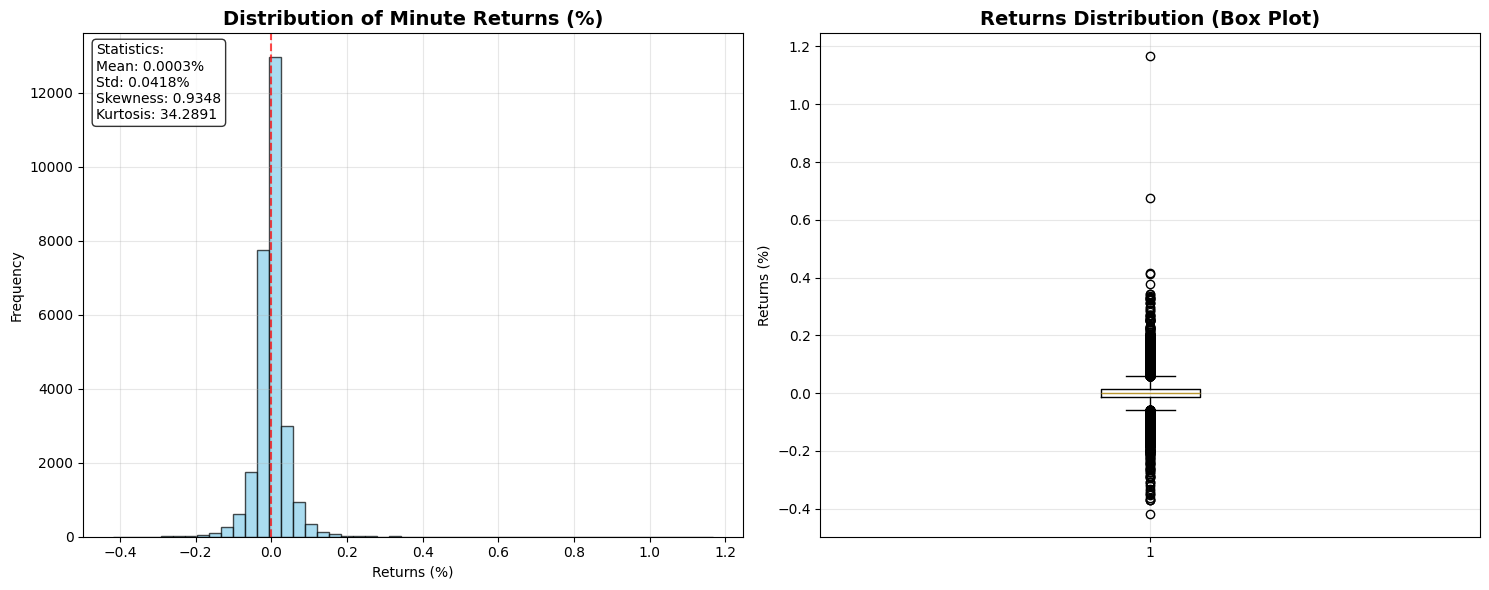

📊 Returns Analysis:
   Mean Return: 0.000342%
   Volatility (Std): 0.0418%
   Max Gain: 1.1663%
   Max Loss: -0.4177%
   Positive Returns: 14042 (50.0%)
   Negative Returns: 14023 (49.9%)
   Extreme movements (>0.084%): 1476 (5.25%)


In [7]:
# Calculate and plot histogram of returns
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

if price_col:
    # Calculate returns (percentage change)
    if 'Returns' in df.columns:
        returns = df['Returns'].dropna()
    else:
        returns = df[price_col].pct_change().dropna()
    
    # Convert to percentage
    returns_pct = returns * 100
    
    # Plot histogram
    axes[0].hist(returns_pct, bins=50, alpha=0.7, color='skyblue', edgecolor='black')
    axes[0].set_title('Distribution of Minute Returns (%)', fontsize=14, fontweight='bold')
    axes[0].set_xlabel('Returns (%)')
    axes[0].set_ylabel('Frequency')
    axes[0].grid(True, alpha=0.3)
    axes[0].axvline(x=0, color='red', linestyle='--', alpha=0.7)
    
    # Add statistics text
    stats_text = f'''Statistics:
Mean: {returns_pct.mean():.4f}%
Std: {returns_pct.std():.4f}%
Skewness: {returns_pct.skew():.4f}
Kurtosis: {returns_pct.kurtosis():.4f}'''
    
    axes[0].text(0.02, 0.98, stats_text, transform=axes[0].transAxes, 
                fontsize=10, verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    # Box plot for outlier detection
    axes[1].boxplot(returns_pct, vert=True)
    axes[1].set_title('Returns Distribution (Box Plot)', fontsize=14, fontweight='bold')
    axes[1].set_ylabel('Returns (%)')
    axes[1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Print return statistics
    print("📊 Returns Analysis:")
    print(f"   Mean Return: {returns_pct.mean():.6f}%")
    print(f"   Volatility (Std): {returns_pct.std():.4f}%")
    print(f"   Max Gain: {returns_pct.max():.4f}%")
    print(f"   Max Loss: {returns_pct.min():.4f}%")
    print(f"   Positive Returns: {(returns_pct > 0).sum()} ({(returns_pct > 0).mean()*100:.1f}%)")
    print(f"   Negative Returns: {(returns_pct < 0).sum()} ({(returns_pct < 0).mean()*100:.1f}%)")
    
    # Extreme movements
    extreme_threshold = 2 * returns_pct.std()
    extreme_moves = returns_pct[abs(returns_pct) > extreme_threshold]
    print(f"   Extreme movements (>{extreme_threshold:.3f}%): {len(extreme_moves)} ({len(extreme_moves)/len(returns_pct)*100:.2f}%)")
    
else:
    print("❌ Could not calculate returns - price column not found")

## 8. Plot Distribution of Volume

Examine the trading volume distribution to understand market activity patterns.

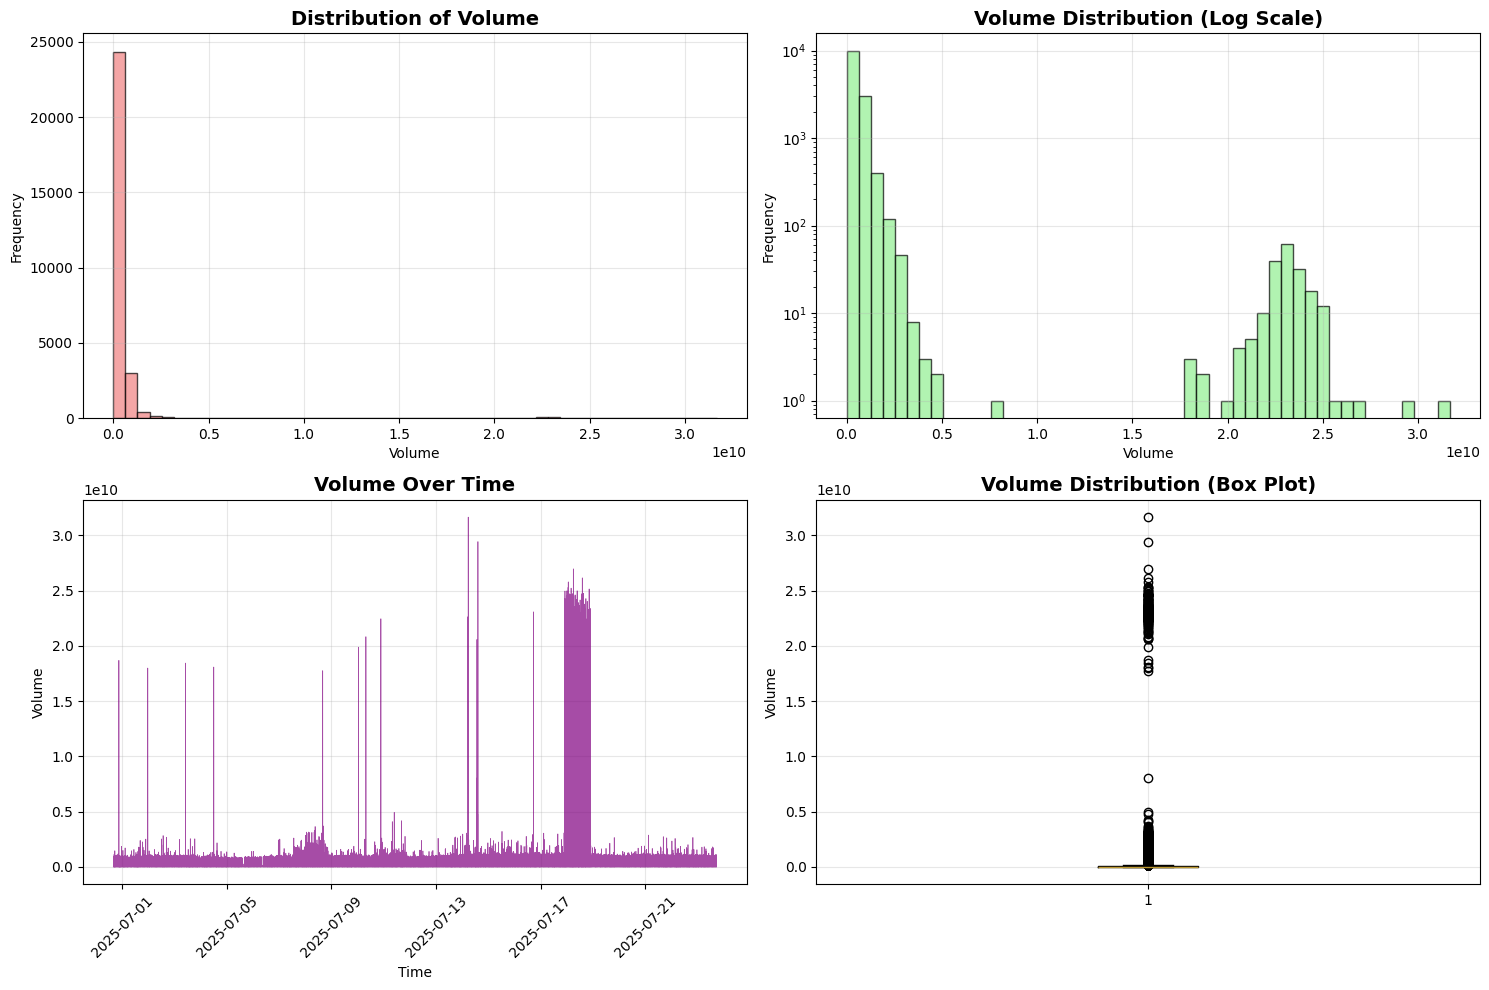

📊 Volume Analysis:
   Average Volume: 327,579,484
   Median Volume: 0
   Max Volume: 31,661,563,904
   Min Volume: 0
   Zero Volume periods: 14421 (51.32%)
   High volume periods (>95th percentile): 1405 (5.00%)
   High volume threshold: 1,087,467,110


In [8]:
# Plot distribution of volume
volume_cols = [col for col in df.columns if 'volume' in col.lower()]

if volume_cols:
    vol_col = volume_cols[0]
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # Histogram of volume
    axes[0,0].hist(df[vol_col], bins=50, alpha=0.7, color='lightcoral', edgecolor='black')
    axes[0,0].set_title(f'Distribution of {vol_col}', fontsize=14, fontweight='bold')
    axes[0,0].set_xlabel('Volume')
    axes[0,0].set_ylabel('Frequency')
    axes[0,0].grid(True, alpha=0.3)
    
    # Log scale histogram (better for skewed data)
    non_zero_volume = df[df[vol_col] > 0][vol_col]
    if len(non_zero_volume) > 0:
        axes[0,1].hist(non_zero_volume, bins=50, alpha=0.7, color='lightgreen', edgecolor='black')
        axes[0,1].set_title(f'{vol_col} Distribution (Log Scale)', fontsize=14, fontweight='bold')
        axes[0,1].set_xlabel('Volume')
        axes[0,1].set_ylabel('Frequency')
        axes[0,1].set_yscale('log')
        axes[0,1].grid(True, alpha=0.3)
    
    # Volume over time
    if 'timestamp' in df.columns:
        axes[1,0].plot(df['timestamp'], df[vol_col], linewidth=0.5, alpha=0.7, color='purple')
        axes[1,0].set_title(f'{vol_col} Over Time', fontsize=14, fontweight='bold')
        axes[1,0].set_xlabel('Time')
        axes[1,0].set_ylabel('Volume')
        axes[1,0].grid(True, alpha=0.3)
        axes[1,0].tick_params(axis='x', rotation=45)
    
    # Box plot for volume
    axes[1,1].boxplot(df[vol_col], vert=True)
    axes[1,1].set_title(f'{vol_col} Distribution (Box Plot)', fontsize=14, fontweight='bold')
    axes[1,1].set_ylabel('Volume')
    axes[1,1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Volume statistics
    print("📊 Volume Analysis:")
    print(f"   Average Volume: {df[vol_col].mean():,.0f}")
    print(f"   Median Volume: {df[vol_col].median():,.0f}")
    print(f"   Max Volume: {df[vol_col].max():,.0f}")
    print(f"   Min Volume: {df[vol_col].min():,.0f}")
    print(f"   Zero Volume periods: {(df[vol_col] == 0).sum()} ({(df[vol_col] == 0).mean()*100:.2f}%)")
    
    # High volume periods
    high_volume_threshold = df[vol_col].quantile(0.95)
    high_volume_periods = df[df[vol_col] > high_volume_threshold]
    print(f"   High volume periods (>95th percentile): {len(high_volume_periods)} ({len(high_volume_periods)/len(df)*100:.2f}%)")
    print(f"   High volume threshold: {high_volume_threshold:,.0f}")
    
else:
    print("❌ No volume column found in the dataset")

## 9. Check for Duplicate Rows

Identify any duplicate records in the dataset that might affect analysis quality.

In [9]:
# Check for duplicate rows
print("🔍 Checking for Duplicate Rows:")
print("=" * 40)

# Check for completely duplicate rows
duplicate_rows = df.duplicated()
num_duplicates = duplicate_rows.sum()

print(f"Total duplicate rows: {num_duplicates}")

if num_duplicates > 0:
    print(f"Percentage of duplicates: {(num_duplicates / len(df)) * 100:.2f}%")
    print("\n📋 Sample duplicate rows:")
    duplicate_indices = df[duplicate_rows].index[:5]  # Show first 5 duplicates
    display(df.loc[duplicate_indices])
    
    # Show what they're duplicating
    print("\n📋 Original rows being duplicated:")
    for idx in duplicate_indices:
        original_mask = (df.iloc[:idx] == df.iloc[idx]).all(axis=1)
        original_idx = df[original_mask].index[0] if original_mask.any() else None
        if original_idx is not None:
            print(f"Row {idx} duplicates row {original_idx}")
else:
    print("✅ No duplicate rows found!")

# Check for duplicate timestamps (more common issue)
if 'timestamp' in df.columns:
    duplicate_timestamps = df['timestamp'].duplicated()
    num_dup_timestamps = duplicate_timestamps.sum()
    
    print(f"\n⏰ Duplicate timestamps: {num_dup_timestamps}")
    
    if num_dup_timestamps > 0:
        print(f"Percentage of duplicate timestamps: {(num_dup_timestamps / len(df)) * 100:.2f}%")
        print("\n📋 Sample rows with duplicate timestamps:")
        dup_timestamp_indices = df[duplicate_timestamps].index[:5]
        display(df.loc[dup_timestamp_indices])
    else:
        print("✅ No duplicate timestamps found!")

# Check data quality
print(f"\n📊 Data Quality Summary:")
print(f"   Total rows: {len(df):,}")
print(f"   Duplicate rows: {num_duplicates:,}")
print(f"   Unique rows: {len(df) - num_duplicates:,}")
if 'timestamp' in df.columns:
    print(f"   Duplicate timestamps: {num_dup_timestamps:,}")
    print(f"   Unique timestamps: {df['timestamp'].nunique():,}")
    
    # Check for gaps in time series
    if len(df) > 1:
        df_sorted = df.sort_values('timestamp')
        time_diffs = df_sorted['timestamp'].diff().dropna()
        expected_interval = pd.Timedelta(minutes=1)  # Expecting 1-minute intervals
        irregular_intervals = time_diffs[time_diffs != expected_interval]
        
        print(f"   Expected 1-minute intervals: {len(time_diffs) - len(irregular_intervals):,}")
        print(f"   Irregular intervals: {len(irregular_intervals):,}")
        
        if len(irregular_intervals) > 0:
            print(f"   Longest gap: {irregular_intervals.max()}")
            print(f"   Shortest interval: {time_diffs.min()}")

🔍 Checking for Duplicate Rows:
Total duplicate rows: 0
✅ No duplicate rows found!

⏰ Duplicate timestamps: 0
✅ No duplicate timestamps found!

📊 Data Quality Summary:
   Total rows: 28,100
   Duplicate rows: 0
   Unique rows: 28,100
   Duplicate timestamps: 0
   Unique timestamps: 28,100
   Expected 1-minute intervals: 23,108
   Irregular intervals: 4,991
   Longest gap: 0 days 00:05:00
   Shortest interval: 0 days 00:01:00


## 10. Data Quality Insights and Trading Patterns

Summary of key findings, anomalies, and interesting patterns discovered during the EDA.

In [10]:
# Generate insights and patterns
print("🔍 KEY INSIGHTS AND PATTERNS")
print("=" * 50)

# Time-based patterns
if 'timestamp' in df.columns and price_col:
    df_analysis = df.copy()
    df_analysis['hour'] = df_analysis['timestamp'].dt.hour
    df_analysis['day_of_week'] = df_analysis['timestamp'].dt.day_name()
    
    # Hourly patterns
    hourly_avg_price = df_analysis.groupby('hour')[price_col].mean()
    hourly_avg_volume = df_analysis.groupby('hour')[volume_cols[0]].mean() if volume_cols else None
    
    print("⏰ TEMPORAL PATTERNS:")
    print(f"   Most active hour: {hourly_avg_volume.idxmax() if hourly_avg_volume is not None else 'N/A'}")
    print(f"   Least active hour: {hourly_avg_volume.idxmin() if hourly_avg_volume is not None else 'N/A'}")
    print(f"   Highest avg price hour: {hourly_avg_price.idxmax()}")
    print(f"   Lowest avg price hour: {hourly_avg_price.idxmin()}")
    
    # Volatility patterns
    if 'Returns' in df.columns or price_col:
        returns_col = 'Returns' if 'Returns' in df.columns else None
        if returns_col is None:
            df_analysis['calculated_returns'] = df_analysis[price_col].pct_change()
            returns_col = 'calculated_returns'
        
        hourly_volatility = df_analysis.groupby('hour')[returns_col].std()
        print(f"   Most volatile hour: {hourly_volatility.idxmax()}")
        print(f"   Least volatile hour: {hourly_volatility.idxmin()}")

# Price movement analysis
print("\n💰 PRICE MOVEMENT ANALYSIS:")
if price_col:
    price_data = df[price_col]
    
    # Trend analysis
    total_return = (price_data.iloc[-1] / price_data.iloc[0] - 1) * 100
    print(f"   Overall return for period: {total_return:.2f}%")
    
    # Support and resistance levels (using quantiles)
    support_level = price_data.quantile(0.1)
    resistance_level = price_data.quantile(0.9)
    print(f"   Support level (10th percentile): ${support_level:,.2f}")
    print(f"   Resistance level (90th percentile): ${resistance_level:,.2f}")
    
    # Price stability
    coefficient_of_variation = (price_data.std() / price_data.mean()) * 100
    print(f"   Price coefficient of variation: {coefficient_of_variation:.2f}%")

# Volume insights
if volume_cols:
    vol_col = volume_cols[0]
    print(f"\n📊 VOLUME INSIGHTS:")
    
    # Volume-price relationship
    if price_col:
        # Calculate correlation between volume and absolute returns
        abs_returns = abs(df[price_col].pct_change().fillna(0))
        volume_return_corr = df[vol_col].corr(abs_returns)
        print(f"   Volume-volatility correlation: {volume_return_corr:.4f}")
        
        # High volume periods
        high_vol_threshold = df[vol_col].quantile(0.9)
        high_vol_periods = df[df[vol_col] > high_vol_threshold]
        avg_return_high_vol = abs(high_vol_periods[price_col].pct_change()).mean() * 100
        avg_return_normal_vol = abs(df[df[vol_col] <= high_vol_threshold][price_col].pct_change()).mean() * 100
        
        print(f"   Avg volatility during high volume: {avg_return_high_vol:.4f}%")
        print(f"   Avg volatility during normal volume: {avg_return_normal_vol:.4f}%")

# Data quality assessment
print(f"\n🔍 DATA QUALITY ASSESSMENT:")
data_quality_score = 100
quality_issues = []

# Check for missing data
missing_pct = (df.isnull().sum().sum() / (len(df) * len(df.columns))) * 100
if missing_pct > 0:
    data_quality_score -= min(missing_pct * 2, 20)
    quality_issues.append(f"Missing data: {missing_pct:.2f}%")

# Check for duplicates
duplicate_pct = (num_duplicates / len(df)) * 100
if duplicate_pct > 0:
    data_quality_score -= min(duplicate_pct * 5, 15)
    quality_issues.append(f"Duplicate rows: {duplicate_pct:.2f}%")

# Check for zero volumes
if volume_cols:
    zero_vol_pct = (df[vol_col] == 0).mean() * 100
    if zero_vol_pct > 10:
        data_quality_score -= min(zero_vol_pct * 0.5, 10)
        quality_issues.append(f"Zero volume periods: {zero_vol_pct:.1f}%")

print(f"   Data quality score: {data_quality_score:.1f}/100")
if quality_issues:
    print("   Issues identified:")
    for issue in quality_issues:
        print(f"     - {issue}")
else:
    print("   ✅ No major data quality issues detected!")

# Recommendations
print(f"\n💡 RECOMMENDATIONS FOR ML MODELING:")
print("   1. Consider time-based features (hour, day of week)")
print("   2. Use rolling windows for technical indicators")
if volume_cols:
    print("   3. Include volume-based features for better predictions")
print("   4. Handle potential data gaps during market closures")
print("   5. Consider volatility clustering in model selection")
if coefficient_of_variation > 5:
    print("   6. High volatility detected - consider robust models")

print(f"\n📈 NEXT STEPS:")
print("   - Feature engineering with technical indicators")
print("   - Time series decomposition analysis") 
print("   - Correlation analysis with external factors")
print("   - Model development and backtesting")

🔍 KEY INSIGHTS AND PATTERNS
⏰ TEMPORAL PATTERNS:
   Most active hour: 14
   Least active hour: 20
   Highest avg price hour: 7
   Lowest avg price hour: 20
   Most volatile hour: 14
   Least volatile hour: 10

💰 PRICE MOVEMENT ANALYSIS:
   Overall return for period: 9.83%
   Support level (10th percentile): $107,916.76
   Resistance level (90th percentile): $119,258.13
   Price coefficient of variation: 4.34%

📊 VOLUME INSIGHTS:
   Volume-volatility correlation: 0.0677
   Avg volatility during high volume: 0.0939%
   Avg volatility during normal volume: 0.0267%

🔍 DATA QUALITY ASSESSMENT:
   Data quality score: 89.9/100
   Issues identified:
     - Missing data: 0.03%
     - Zero volume periods: 51.3%

💡 RECOMMENDATIONS FOR ML MODELING:
   1. Consider time-based features (hour, day of week)
   2. Use rolling windows for technical indicators
   3. Include volume-based features for better predictions
   4. Handle potential data gaps during market closures
   5. Consider volatility cluste